In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras as k
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['cifar-10-python.tar.gz']


In [2]:
# Load CIFAR10 data
(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_testo = y_test

In [6]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [7]:
print(y_train.shape)
print(y_test.shape)
print(y_testo.shape)

(50000, 10)
(10000, 10)
(10000, 1)


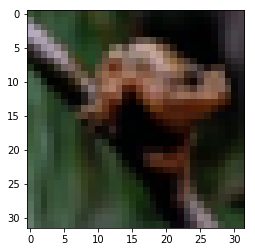

In [8]:
plt.imshow(X_train[5000][:,:,:])

In [9]:
from __future__ import print_function

In [10]:
model = Sequential()
batch_size = 64
num_classes = 10
epochs = 50

In [11]:
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
__________

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range = 0.1)

datagen.fit(X_train)

In [15]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=20, validation_data = (X_test, y_test))
# model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
#                    steps_per_epoch = X_train.shape[0] // batch_size,
#                    epochs = 15, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 235us/step - loss: 1.6493 - acc: 0.3935 - val_loss: 1.3061 - val_acc: 0.5349
Epoch 2/20
50000/50000 [==============================] - 6s 126us/step - loss: 1.3042 - acc: 0.5336 - val_loss: 1.1370 - val_acc: 0.6059
Epoch 3/20
50000/50000 [==============================] - 6s 127us/step - loss: 1.1451 - acc: 0.5968 - val_loss: 1.0551 - val_acc: 0.6261
Epoch 4/20
50000/50000 [==============================] - 6s 127us/step - loss: 1.0403 - acc: 0.6366 - val_loss: 0.9701 - val_acc: 0.6591
Epoch 5/20
50000/50000 [==============================] - 6s 127us/step - loss: 0.9739 - acc: 0.6574 - val_loss: 0.9187 - val_acc: 0.6758
Epoch 6/20
50000/50000 [==============================] - 6s 125us/step - loss: 0.9249 - acc: 0.6775 - val_loss: 0.8577 - val_acc: 0.7010
Epoch 7/20
50000/50000 [==============================] - 6s 127us/step -

In [16]:
predicto = model.predict_classes(X_test)
predicto.shape

(10000,)

In [17]:
y_testo.shape

(10000, 1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testo, predicto)

0.7498

In [19]:
name = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [20]:
from mpl_toolkits.axes_grid1 import ImageGrid

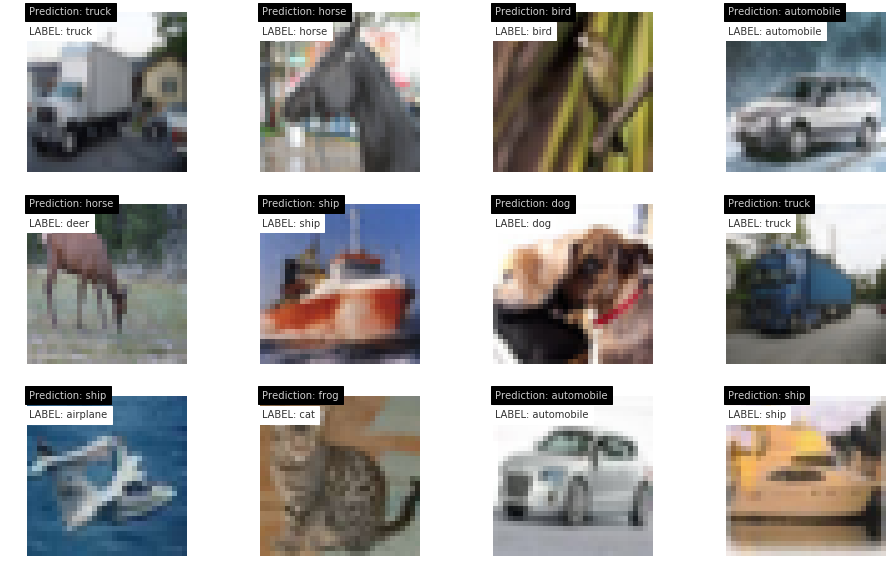

In [21]:
R = 3
C = 4
fig, axes = plt.subplots(R,C, figsize=(16,10))

for i in range(R):
    for j in range(C):
        r = np.random.randint(10000, size=1)[0]
        axes[i, j].imshow(X_test[r][:,:,:])
        axes[i, j].plot()
        #print('this is a', name[y_testo[r][0]], '-------- prediction is:', name[predicto[r]])
        axes[i, j].text(0, 0, 'Prediction: %s' % name[predicto[r]], color='w', backgroundcolor='k', alpha=0.8)
        axes[i, j].text(0, 3.9, 'LABEL: %s' % name[y_testo[r][0]], color='k', backgroundcolor='w', alpha=0.8)
        axes[i, j].axis('off')
        